In [2]:
#Principal Component Analysis
!pip install scipy
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import scipy.sparse

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


[nltk_data] Downloading package punkt to
[nltk_data]     /home/98dda699-9962-43db-8875-
[nltk_data]     90fb6ab1be8f/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/98dda699-9962-43db-8875-
[nltk_data]     90fb6ab1be8f/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/98dda699-9962-43db-8875-
[nltk_data]     90fb6ab1be8f/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

In [6]:
# Define the path to reviews data
reviews_data_path = 'Reviews.csv'
preprocessed_data_path = 'PreprocessedReviews.csv'  
tfidf_matrix_path = 'TfidfMatrix.npz'  

if not os.path.exists(preprocessed_data_path):
    chunk_size = 50 
    chunks = pd.read_csv(reviews_data_path, chunksize=chunk_size, on_bad_lines='skip')

    reviews_data_list = []

    for chunk in chunks:
        chunk['ProcessedText'] = chunk['Text'].apply(preprocess_text)
        reviews_data_list.append(chunk)

In [12]:
# Concatenate all chunks into a single DataFrame
reviews_data_concatenated = pd.concat(reviews_data_list, ignore_index=True)
reviews_data_concatenated.dropna(subset=['ProcessedText'], inplace=True)  # Drop rows with NaN values in 'ProcessedText' column
reviews_data_concatenated.to_csv(preprocessed_data_path, index=False)

# Load preprocessed data
reviews_data_concatenated = pd.read_csv(preprocessed_data_path)

if not os.path.exists(tfidf_matrix_path):
    vectorizer = TfidfVectorizer(max_features=50)  # Limited the number of features to 500 for practicality reasons
    X = vectorizer.fit_transform(reviews_data_concatenated['ProcessedText'].astype(str))  # Convert to string to handle NaN values
    scipy.sparse.save_npz(tfidf_matrix_path, X)

# Load TF-IDF matrix
X = scipy.sparse.load_npz(tfidf_matrix_path)

In [14]:
X_dense = X.todense()

In [24]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=50)
X_pca_reduced = pca.fit_transform(np.asarray(X_dense))

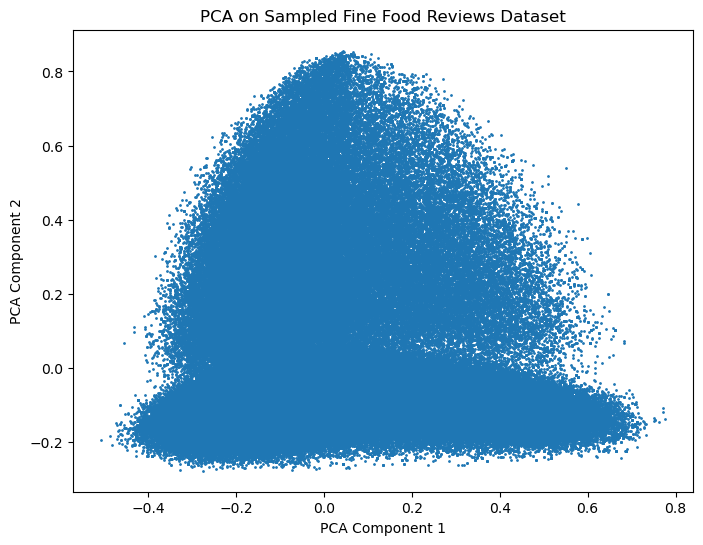

Shape of PCA reduced data: (568454, 50)
Explained variance ratio: [0.06983095 0.05975219 0.04470451 0.0405816  0.03800047 0.03353568
 0.03057522 0.02767512 0.02623595 0.0245389  0.02421004 0.02267521
 0.02237594 0.02146018 0.02081259 0.02003453 0.01980165 0.01933377
 0.01893043 0.01837201 0.01798694 0.01764291 0.01709731 0.0166295
 0.01644815 0.0159838  0.01568161 0.01556555 0.01506253 0.01470624
 0.0143776  0.01364039 0.01354933 0.01341064 0.0132727  0.01296418
 0.01274216 0.01240058 0.01226785 0.01215998 0.01182045 0.0116607
 0.01140443 0.01132923 0.01080132 0.01040236 0.00995649 0.00960319
 0.00889964 0.00709528]


In [28]:
# Shape of the reduced data and explained variance ratio
shape = X_pca_reduced.shape
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], s=1)  # s=1 to make dots smaller
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on Sampled Fine Food Reviews Dataset')
plt.show()

# Output the shape and explained variance ratio
print('Shape of PCA reduced data:', shape)
print('Explained variance ratio:', explained_variance_ratio)

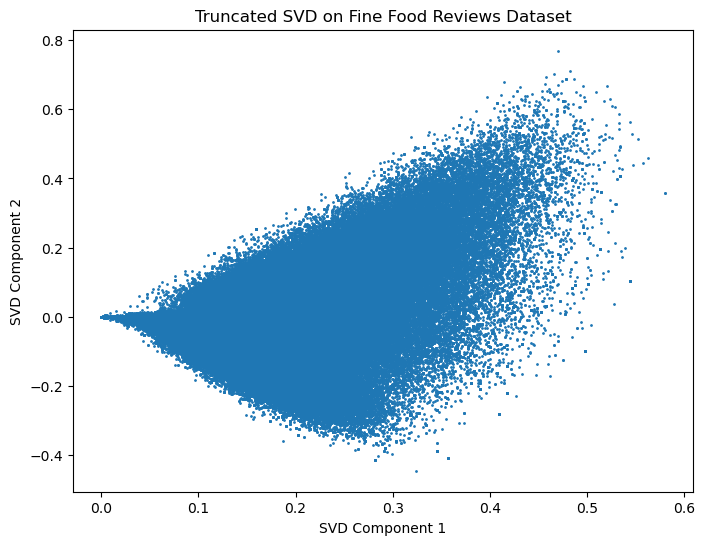

Shape of SVD reduced data: (568454, 50)
Explained variance ratio: [0.00566932 0.01091924 0.00962573 0.0092747  0.00674359 0.00509524
 0.00481266 0.00404746 0.00392171 0.00380337 0.00343093 0.00324756
 0.00323123 0.00315748 0.00310656 0.00300959 0.00299227 0.00278153
 0.00272752 0.00267613 0.00263654 0.00247186 0.00239091 0.00235001
 0.00229757 0.00228052 0.00226289 0.00221756 0.00219566 0.00215061
 0.00209979 0.00207624 0.002053   0.00201247 0.00198555 0.00196864
 0.001954   0.00192074 0.00188906 0.00187938 0.00186742 0.0018159
 0.00180398 0.00178465 0.00174732 0.001737   0.00172043 0.00166795
 0.00165778 0.00159945]


In [32]:
# Function to preprocess the text
def preprocess_text(text):
    text = str(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(lemmatized_words)

# Load the reviews data, skipping any bad lines
reviews_data_path = 'Reviews.csv'
reviews_data = pd.read_csv(reviews_data_path, on_bad_lines='skip')

# Preprocess the review text
reviews_data['ProcessedText'] = reviews_data['Text'].apply(preprocess_text)

# Vectorize the preprocessed text
vectorizer = TfidfVectorizer(max_features=5000)  # Limited the number of features to 5000 for practicality reasons
X = vectorizer.fit_transform(reviews_data['ProcessedText'])

# Apply TruncatedSVD
svd = TruncatedSVD(n_components=50)
X_svd_reduced = svd.fit_transform(X)

# Shape of the reduced data and explained variance ratio
shape = X_svd_reduced.shape
explained_variance_ratio = svd.explained_variance_ratio_

# Visualize the first two components
plt.figure(figsize=(8, 6))
plt.scatter(X_svd_reduced[:, 0], X_svd_reduced[:, 1], s=1)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Truncated SVD on Fine Food Reviews Dataset')
plt.show()

# Output the shape and explained variance ratio
print('Shape of SVD reduced data:', shape)
print('Explained variance ratio:', explained_variance_ratio)